In [6]:
import sqlalchemy as sa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa
%config IPCompleter.greedy=True
from sqlalchemy import inspect

In [3]:
con = sa.create_engine('sqlite:////.../airbnb.db')

In [7]:
insp = inspect(con)
tables = insp.get_table_names()
tables

['listings', 'listings_det']

In [8]:
listings = pd.read_sql('listings', con)
listings_det = pd.read_sql('listings_det', con)

In [46]:
price_m2 = pd.read_excel('.../idealista.xlsx')
price_m2

,price_m2,district
0,8000,Mitte
1,6400,Pankow
2,6200,Reinickendorf
3,6000,Spandau
4,7800,Charlottenburg-Wilmersdorf
5,5900,Steglitz-Zehlendorf
6,6500,Tempelhof-Schoneberg
7,6500,Friedrichschain-Kreuzberg
8,5800,Neukolln
9,5000,Marzahn-Hellensdorf


In [47]:
price_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price_m2  12 non-null     int64 
 1   district  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


# Data quality

In [49]:
listings.head()

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,0,652868795892201022,Kleine Auszeit? Oder Business-Trip? Alles mögl...,21708794,Familie Sek,Tempelhof - Schöneberg,Lichtenrade,52.357652,13.399098,Entire home/apt,88,1,0,None,NaN,1,6,0,None
1,1,27080612,Apartment with Living/Sleeping Room & own Kitchen,130216168,Tommy,Marzahn - Hellersdorf,Mahlsdorf,52.520060,13.659560,Entire home/apt,60,2,126,2022-09-11,2.54,2,163,18,None
2,2,29077694,Wohnung im Grünen nah an der Metropole,219116245,Tilmann,Steglitz - Zehlendorf,Zehlendorf Südwest,52.412320,13.207150,Entire home/apt,36,8,29,2022-05-29,0.63,1,6,6,None
3,3,665648367391379321,Schöne Eigentumswohnung mit Balkon,106965422,Paul,Steglitz - Zehlendorf,Drakestr.,52.402144,13.273865,Entire home/apt,120,1,0,None,NaN,1,257,0,"Available with a mobility lease only (""bail mo..."
4,4,37738004,Remise Villa Erica Superior Apartment,42048631,Archibald,Steglitz - Zehlendorf,Drakestr.,52.410150,13.292070,Entire home/apt,110,5,1,2019-10-26,0.03,8,160,0,None


In [50]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680 entries, 0 to 16679
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           16680 non-null  int64  
 1   id                              16680 non-null  int64  
 2   name                            16660 non-null  object 
 3   host_id                         16680 non-null  int64  
 4   host_name                       16664 non-null  object 
 5   neighbourhood_group             16680 non-null  object 
 6   neighbourhood                   16680 non-null  object 
 7   latitude                        16680 non-null  float64
 8   longitude                       16680 non-null  float64
 9   room_type                       16680 non-null  object 
 10  price                           16680 non-null  int64  
 11  minimum_nights                  16680 non-null  int64  
 12  number_of_reviews               

In [51]:
to_delete = ['index',
              'host_name',
              'number_of_reviews',
              'last_review',
              'reviews_per_month',
              'number_of_reviews_ltm',
              'license'
             ]

listings.drop(columns = to_delete, inplace=True)

listings

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,652868795892201022,Kleine Auszeit? Oder Business-Trip? Alles mögl...,21708794,Tempelhof - Schöneberg,Lichtenrade,52.357652,13.399098,Entire home/apt,88,1,1,6
1,27080612,Apartment with Living/Sleeping Room & own Kitchen,130216168,Marzahn - Hellersdorf,Mahlsdorf,52.520060,13.659560,Entire home/apt,60,2,2,163
2,29077694,Wohnung im Grünen nah an der Metropole,219116245,Steglitz - Zehlendorf,Zehlendorf Südwest,52.412320,13.207150,Entire home/apt,36,8,1,6
3,665648367391379321,Schöne Eigentumswohnung mit Balkon,106965422,Steglitz - Zehlendorf,Drakestr.,52.402144,13.273865,Entire home/apt,120,1,1,257
4,37738004,Remise Villa Erica Superior Apartment,42048631,Steglitz - Zehlendorf,Drakestr.,52.410150,13.292070,Entire home/apt,110,5,8,160
...,...,...,...,...,...,...,...,...,...,...,...,...
16675,2650812,Gäste-Zimmer ALEXA 2,13569320,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.457760,13.725400,Private room,99,1,4,351
16676,39853201,"3-Zi-Wohnung am Dämeritzsee, Berlin, Brandenburg",89818386,Treptow - Köpenick,Müggelheim,52.418070,13.741730,Entire home/apt,160,4,1,148
16677,2855881,Gäste-Zimmer ALEXA 4,13569320,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.459650,13.725480,Private room,195,1,4,336
16678,46313178,TESLA / Grünheide Wohnung hochwertig möbliert,87267772,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.460610,13.699170,Entire home/apt,60,90,1,288


In [52]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680 entries, 0 to 16679
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16680 non-null  int64  
 1   name                            16660 non-null  object 
 2   host_id                         16680 non-null  int64  
 3   neighbourhood_group             16680 non-null  object 
 4   neighbourhood                   16680 non-null  object 
 5   latitude                        16680 non-null  float64
 6   longitude                       16680 non-null  float64
 7   room_type                       16680 non-null  object 
 8   price                           16680 non-null  int64  
 9   minimum_nights                  16680 non-null  int64  
 10  calculated_host_listings_count  16680 non-null  int64  
 11  availability_365                16680 non-null  int64  
dtypes: float64(2), int64(6), object(

In [53]:
for x in ['neighbourhood_group','neighbourhood','room_type']:
    listings[x] = listings[x].astype('category')

In [54]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680 entries, 0 to 16679
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              16680 non-null  int64   
 1   name                            16660 non-null  object  
 2   host_id                         16680 non-null  int64   
 3   neighbourhood_group             16680 non-null  category
 4   neighbourhood                   16680 non-null  category
 5   latitude                        16680 non-null  float64 
 6   longitude                       16680 non-null  float64 
 7   room_type                       16680 non-null  category
 8   price                           16680 non-null  int64   
 9   minimum_nights                  16680 non-null  int64   
 10  calculated_host_listings_count  16680 non-null  int64   
 11  availability_365                16680 non-null  int64   
dtypes: category(3), fl

In [55]:
listings[listings.name.isna()]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
772,2129714,None,10851701,Mitte,Parkviertel,52.55561,13.34161,Entire home/apt,50,4,1,0
903,2364544,None,4920909,Friedrichshain-Kreuzberg,Frankfurter Allee Nord,52.51735,13.46574,Entire home/apt,50,7,1,0
1591,4877492,None,19056175,Neukölln,Reuterstraße,52.48300,13.43242,Private room,25,1,1,0
1850,5830810,None,21437927,Neukölln,Rixdorf,52.47130,13.44252,Private room,50,1,3,0
2144,6857609,None,35936948,Pankow,Prenzlauer Berg Süd,52.53282,13.43485,Entire home/apt,50,2,1,0
2362,7593011,None,39818582,Tempelhof - Schöneberg,Friedenau,52.46682,13.34131,Entire home/apt,40,14,1,0
3142,9855780,None,14637588,Neukölln,Rixdorf,52.47243,13.44444,Entire home/apt,31,2,1,0
3154,9870480,None,50796520,Friedrichshain-Kreuzberg,Karl-Marx-Allee-Süd,52.51239,13.42894,Entire home/apt,45,1,1,0
3281,10154785,None,52118104,Mitte,Tiergarten Süd,52.50499,13.34245,Entire home/apt,49,2,1,0
3301,10115551,None,30298694,Pankow,Prenzlauer Berg Süd,52.53919,13.42490,Private room,39,1,1,0


In [56]:
listings.duplicated().sum()

0

In [57]:
listings.neighbourhood_group.value_counts()

Friedrichshain-Kreuzberg    3660
Mitte                       3568
Pankow                      2587
Neukölln                    2256
Charlottenburg-Wilm.        1335
Tempelhof - Schöneberg      1102
Treptow - Köpenick           625
Lichtenberg                  481
Steglitz - Zehlendorf        476
Reinickendorf                275
Spandau                      168
Marzahn - Hellersdorf        147
Name: neighbourhood_group, dtype: int64

In [58]:
listings.neighbourhood.value_counts()

Alexanderplatz               937
Frankfurter Allee Süd FK     906
Tempelhofer Vorstadt         813
Reuterstraße                 651
Brunnenstr. Süd              635
                            ... 
Marzahn-Nord                   3
Forst Grunewald                2
Neu-Hohenschönhausen Nord      2
Allende-Viertel                2
Hellersdorf-Süd                1
Name: neighbourhood, Length: 138, dtype: int64

In [59]:
listings.room_type.value_counts()

Entire home/apt    9904
Private room       6438
Shared room         192
Hotel room          146
Name: room_type, dtype: int64

In [60]:
listings = listings.loc[listings.room_type != 'Hotel room']
listings.room_type.value_counts()

Entire home/apt    9904
Private room       6438
Shared room         192
Hotel room            0
Name: room_type, dtype: int64

In [61]:
listings.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,652868795892201022,Kleine Auszeit? Oder Business-Trip? Alles mögl...,21708794,Tempelhof - Schöneberg,Lichtenrade,52.357652,13.399098,Entire home/apt,88,1,1,6
1,27080612,Apartment with Living/Sleeping Room & own Kitchen,130216168,Marzahn - Hellersdorf,Mahlsdorf,52.520060,13.659560,Entire home/apt,60,2,2,163
2,29077694,Wohnung im Grünen nah an der Metropole,219116245,Steglitz - Zehlendorf,Zehlendorf Südwest,52.412320,13.207150,Entire home/apt,36,8,1,6
3,665648367391379321,Schöne Eigentumswohnung mit Balkon,106965422,Steglitz - Zehlendorf,Drakestr.,52.402144,13.273865,Entire home/apt,120,1,1,257
4,37738004,Remise Villa Erica Superior Apartment,42048631,Steglitz - Zehlendorf,Drakestr.,52.410150,13.292070,Entire home/apt,110,5,8,160


In [62]:
listings.iloc[:,8:12].describe().T

,count,mean,std,min,25%,50%,75%,max
price,16534.0,94.360227,114.439729,8.0,40.0,65.0,108.0,4375.0
minimum_nights,16534.0,12.206181,39.281075,1.0,2.0,3.0,5.0,1124.0
calculated_host_listings_count,16534.0,3.368030,7.786992,1.0,1.0,1.0,2.0,68.0
availability_365,16534.0,84.882182,122.172452,0.0,0.0,0.0,162.0,365.0


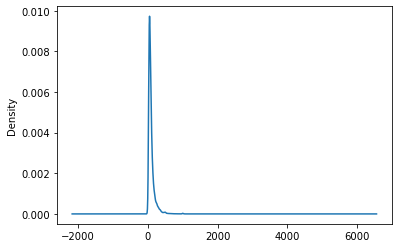

In [65]:
listings.price.plot.kde();

In [67]:
listings.price.loc[listings.price > 1000].value_counts()

3000    2
2500    1
2286    1
2047    1
1050    1
1250    1
2000    1
4375    1
1594    1
1788    1
1326    1
1111    1
1500    1
2800    1
1900    1
Name: price, dtype: int64

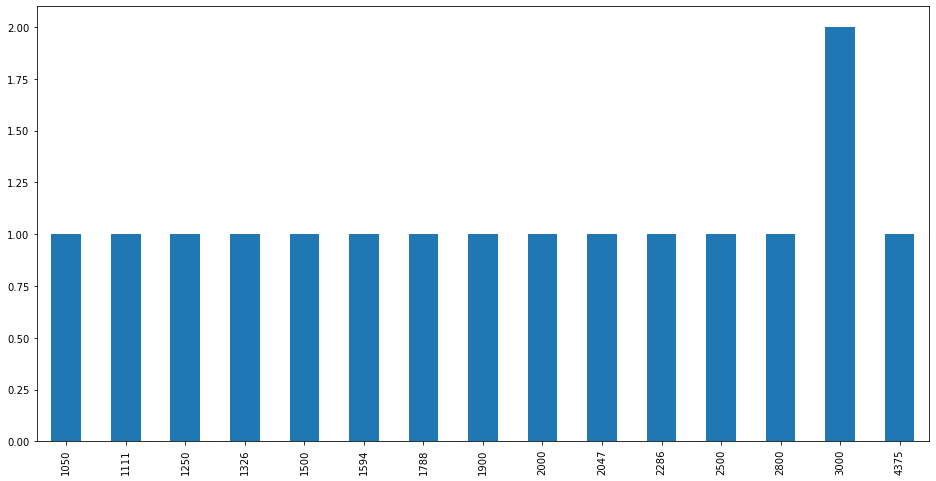

In [69]:
plt.figure(figsize=(16,8))
listings.price.loc[listings.price > 1000].value_counts().sort_index().plot.bar()
plt.xticks(size = 10);

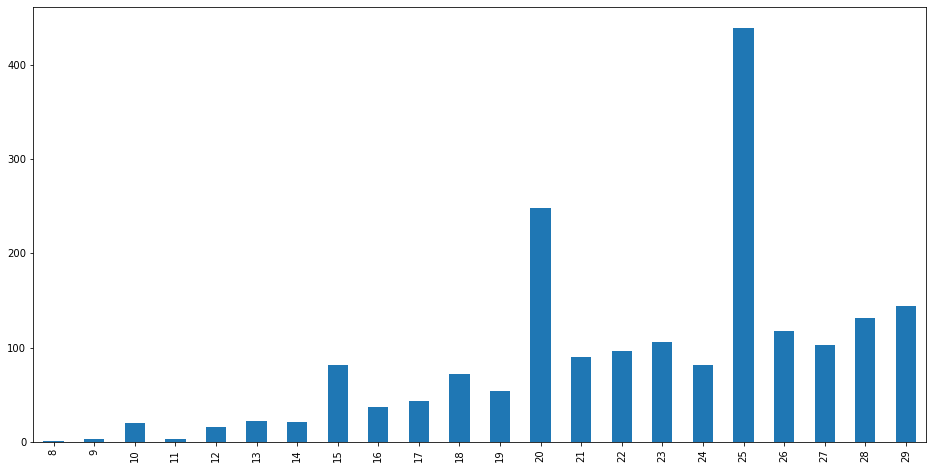

In [71]:
#Values close to cero
plt.figure(figsize=(16,8))
listings.price.loc[listings.price < 30].value_counts().sort_index().plot.bar()
plt.xticks(size = 10);

There are many properties getting rented for under 30 euros per day, so we will delete them

In [72]:
listings = listings.loc[listings.price > 30]
listings

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,652868795892201022,Kleine Auszeit? Oder Business-Trip? Alles mögl...,21708794,Tempelhof - Schöneberg,Lichtenrade,52.357652,13.399098,Entire home/apt,88,1,1,6
1,27080612,Apartment with Living/Sleeping Room & own Kitchen,130216168,Marzahn - Hellersdorf,Mahlsdorf,52.520060,13.659560,Entire home/apt,60,2,2,163
2,29077694,Wohnung im Grünen nah an der Metropole,219116245,Steglitz - Zehlendorf,Zehlendorf Südwest,52.412320,13.207150,Entire home/apt,36,8,1,6
3,665648367391379321,Schöne Eigentumswohnung mit Balkon,106965422,Steglitz - Zehlendorf,Drakestr.,52.402144,13.273865,Entire home/apt,120,1,1,257
4,37738004,Remise Villa Erica Superior Apartment,42048631,Steglitz - Zehlendorf,Drakestr.,52.410150,13.292070,Entire home/apt,110,5,8,160
...,...,...,...,...,...,...,...,...,...,...,...,...
16675,2650812,Gäste-Zimmer ALEXA 2,13569320,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.457760,13.725400,Private room,99,1,4,351
16676,39853201,"3-Zi-Wohnung am Dämeritzsee, Berlin, Brandenburg",89818386,Treptow - Köpenick,Müggelheim,52.418070,13.741730,Entire home/apt,160,4,1,148
16677,2855881,Gäste-Zimmer ALEXA 4,13569320,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.459650,13.725480,Private room,195,1,4,336
16678,46313178,TESLA / Grünheide Wohnung hochwertig möbliert,87267772,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.460610,13.699170,Entire home/apt,60,90,1,288


In [73]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680 entries, 0 to 16679
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         16680 non-null  int64  
 1   id                                            16680 non-null  int64  
 2   listing_url                                   16680 non-null  object 
 3   scrape_id                                     16680 non-null  int64  
 4   last_scraped                                  16680 non-null  object 
 5   source                                        16680 non-null  object 
 6   name                                          16660 non-null  object 
 7   description                                   16367 non-null  object 
 8   neighborhood_overview                         8820 non-null   object 
 9   picture_url                                   16680 non-null 

In [74]:
include = ['id',
              'description',
              'host_is_superhost',
              'accommodates',
              'bathrooms',
              'bedrooms',
              'beds',
              'number_of_reviews',
              'review_scores_rating',
              'review_scores_communication',
              'review_scores_location'
             ]

listings_det = listings_det.loc[:,include]

listings_det

,id,description,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,652868795892201022,"Hallo ihr Lieben,<br /><br />kommt und verbrin...",f,5,NaN,2.0,3.0,0,NaN,NaN,NaN
1,29077694,Wohnung befindet sich im Souterrain eines Einf...,t,2,NaN,1.0,2.0,29,4.79,4.93,4.52
2,27080612,The well-equipped 30 m² large Apartment is loc...,t,2,NaN,1.0,1.0,126,4.98,4.99,4.79
3,665648367391379321,Wenn du in dieser zentral gelegenen Unterkunft...,f,6,NaN,2.0,2.0,0,NaN,NaN,NaN
4,3176,This beautiful first floor apartment is situa...,f,4,NaN,1.0,2.0,147,4.63,4.69,4.92
...,...,...,...,...,...,...,...,...,...,...,...
16675,2650812,Für den angenehmen Aufenthalt haben wir ein Ei...,f,3,NaN,1.0,3.0,0,NaN,NaN,NaN
16676,39853201,Die 112qm große 3-Raum-EG-Wohnung liegt direkt...,t,4,NaN,2.0,2.0,23,5.00,5.00,5.00
16677,2855881,Unser Zuhause in Schönblick bietet zusätzlich ...,f,6,NaN,1.0,4.0,0,NaN,NaN,NaN
16678,46313178,Tolle neue hochwertig Design-möblierte Wohnung...,f,2,NaN,1.0,1.0,0,NaN,NaN,NaN


In [75]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680 entries, 0 to 16679
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           16680 non-null  int64  
 1   description                  16367 non-null  object 
 2   host_is_superhost            16676 non-null  object 
 3   accommodates                 16680 non-null  int64  
 4   bathrooms                    0 non-null      float64
 5   bedrooms                     15306 non-null  float64
 6   beds                         16352 non-null  float64
 7   number_of_reviews            16680 non-null  int64  
 8   review_scores_rating         13812 non-null  float64
 9   review_scores_communication  13561 non-null  float64
 10  review_scores_location       13552 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.4+ MB


In [76]:
listings_det['host_is_superhost'] = listings_det['host_is_superhost'].astype('category')
    
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680 entries, 0 to 16679
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           16680 non-null  int64   
 1   description                  16367 non-null  object  
 2   host_is_superhost            16676 non-null  category
 3   accommodates                 16680 non-null  int64   
 4   bathrooms                    0 non-null      float64 
 5   bedrooms                     15306 non-null  float64 
 6   beds                         16352 non-null  float64 
 7   number_of_reviews            16680 non-null  int64   
 8   review_scores_rating         13812 non-null  float64 
 9   review_scores_communication  13561 non-null  float64 
 10  review_scores_location       13552 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 1.3+ MB


In [77]:
listings_det.isna().sum()

id                                 0
description                      313
host_is_superhost                  4
accommodates                       0
bathrooms                      16680
bedrooms                        1374
beds                             328
number_of_reviews                  0
review_scores_rating            2868
review_scores_communication     3119
review_scores_location          3128
dtype: int64

In [78]:
pd.crosstab(listings_det.beds, listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
beds,,,,,,,,,,,,,,,,
1.0,1728,7068,578,386,24,17,0,2,0,2,0,1,0,0,1,3
2.0,109,1254,948,1463,104,64,5,5,0,1,0,0,0,0,0,0
3.0,15,78,212,440,252,248,15,14,1,2,0,0,1,0,0,0
4.0,2,19,22,252,99,147,46,45,5,3,3,0,0,0,0,0
5.0,0,2,4,23,86,71,25,29,5,14,0,4,1,0,0,0
6.0,4,1,3,6,14,109,14,14,12,10,2,11,1,4,0,0
7.0,0,0,0,0,2,12,20,7,6,3,2,7,3,5,0,0
8.0,0,0,0,1,0,5,2,29,8,4,1,3,1,2,0,0
9.0,0,0,0,0,0,1,1,2,9,0,0,6,2,0,1,1


In [79]:
listings_det['beds'].value_counts(dropna = False)

1.0     9810
2.0     3953
3.0     1278
4.0      643
NaN      328
5.0      264
6.0      205
7.0       67
8.0       56
9.0       23
10.0      21
11.0      10
12.0       6
16.0       5
14.0       5
13.0       2
17.0       2
15.0       1
22.0       1
Name: beds, dtype: int64

In [85]:
def null_beds(register):
    conditions = [(register.accommodates <= 2),
               (register.accommodates > 2) & (register.accommodates <= 4),
               (register.accommodates > 4) & (register.accommodates <= 6),
               (register.accommodates > 6)]

    results = [1,2,3,4]
    
    return(np.select(conditions,results, default = -999))

listings_det.loc[listings_det.beds.isna(),'beds'] = listings_det.loc[listings_det.beds.isna()].apply(null_beds, axis = 1).astype('float64')

In [86]:
listings_det.beds.value_counts(dropna = False)

1.0     10086
2.0      3995
3.0      1288
4.0       643
5.0       264
6.0       205
7.0        67
8.0        56
9.0        23
10.0       21
11.0       10
12.0        6
16.0        5
14.0        5
13.0        2
17.0        2
15.0        1
22.0        1
Name: beds, dtype: int64

In [84]:
listings_det.bedrooms.value_counts(dropna = False)

1.0     12051
2.0      2389
NaN      1374
3.0       656
4.0       148
5.0        39
6.0        12
7.0         8
10.0        1
12.0        1
9.0         1
Name: bedrooms, dtype: int64

In [88]:
def null_bedrooms(register):
    conditions = [(register.beds <= 2),
               (register.beds > 2) & (register.beds <= 4),
               (register.beds > 4) & (register.beds <= 6),
               (register.beds > 6)]

    results = [1,2,3,4]
    
    return(np.select(conditions,results, default = -999))

listings_det.loc[listings_det.bedrooms.isna(),'bedrooms'] = listings_det.loc[listings_det.bedrooms.isna()].apply(null_bedrooms, axis = 1).astype('float64')

In [89]:
listings_det.bedrooms.value_counts(dropna = False)

1.0     13370
2.0      2441
3.0       659
4.0       148
5.0        39
6.0        12
7.0         8
10.0        1
12.0        1
9.0         1
Name: bedrooms, dtype: int64

In [90]:
listings_det.drop(columns = 'bathrooms', inplace = True)
listings_det

,id,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,652868795892201022,"Hallo ihr Lieben,<br /><br />kommt und verbrin...",f,5,2.0,3.0,0,NaN,NaN,NaN
1,29077694,Wohnung befindet sich im Souterrain eines Einf...,t,2,1.0,2.0,29,4.79,4.93,4.52
2,27080612,The well-equipped 30 m² large Apartment is loc...,t,2,1.0,1.0,126,4.98,4.99,4.79
3,665648367391379321,Wenn du in dieser zentral gelegenen Unterkunft...,f,6,2.0,2.0,0,NaN,NaN,NaN
4,3176,This beautiful first floor apartment is situa...,f,4,1.0,2.0,147,4.63,4.69,4.92
...,...,...,...,...,...,...,...,...,...,...
16675,2650812,Für den angenehmen Aufenthalt haben wir ein Ei...,f,3,1.0,3.0,0,NaN,NaN,NaN
16676,39853201,Die 112qm große 3-Raum-EG-Wohnung liegt direkt...,t,4,2.0,2.0,23,5.00,5.00,5.00
16677,2855881,Unser Zuhause in Schönblick bietet zusätzlich ...,f,6,1.0,4.0,0,NaN,NaN,NaN
16678,46313178,Tolle neue hochwertig Design-möblierte Wohnung...,f,2,1.0,1.0,0,NaN,NaN,NaN


In [91]:
listings_det.duplicated().sum()

0

In [92]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680 entries, 0 to 16679
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           16680 non-null  int64   
 1   description                  16367 non-null  object  
 2   host_is_superhost            16676 non-null  category
 3   accommodates                 16680 non-null  int64   
 4   bedrooms                     16680 non-null  float64 
 5   beds                         16680 non-null  float64 
 6   number_of_reviews            16680 non-null  int64   
 7   review_scores_rating         13812 non-null  float64 
 8   review_scores_communication  13561 non-null  float64 
 9   review_scores_location       13552 non-null  float64 
dtypes: category(1), float64(5), int64(3), object(1)
memory usage: 1.2+ MB


# Analysis of categorical variables

In [93]:
listings_det.host_is_superhost.value_counts()

f    14351
t     2325
Name: host_is_superhost, dtype: int64

In [94]:
listings_det.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
id,16680.0,5.324879e+16,1.768728e+17,3176.0,13413633.50,26257623.50,42429145.5,7.155612e+17
accommodates,16680.0,2.775420e+00,1.691734e+00,0.0,2.00,2.00,4.0,1.600000e+01
bedrooms,16680.0,1.269484e+00,6.326483e-01,1.0,1.00,1.00,1.0,1.200000e+01
beds,16680.0,1.728118e+00,1.316373e+00,1.0,1.00,1.00,2.0,2.200000e+01
number_of_reviews,16680.0,2.776787e+01,6.230097e+01,0.0,1.00,6.00,22.0,1.483000e+03
review_scores_rating,13812.0,4.649862e+00,7.373061e-01,0.0,4.61,4.85,5.0,5.000000e+00
review_scores_communication,13561.0,4.824478e+00,3.761577e-01,0.0,4.80,4.95,5.0,5.000000e+00
review_scores_location,13552.0,4.758222e+00,3.627516e-01,0.0,4.67,4.86,5.0,5.000000e+00


Nothing weird here

# ANALYTICAL DATAMART

In [96]:
listings.shape

(14052, 12)

In [97]:
listings_det.shape

(16680, 10)

In [118]:
df = pd.merge(left = listings, right = listings_det, how = 'left', on = 'id')
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,652868795892201022,Kleine Auszeit? Oder Business-Trip? Alles mögl...,21708794,Tempelhof - Schöneberg,Lichtenrade,52.357652,13.399098,Entire home/apt,88,1,...,6,"Hallo ihr Lieben,<br /><br />kommt und verbrin...",f,5,2.0,3.0,0,NaN,NaN,NaN
1,27080612,Apartment with Living/Sleeping Room & own Kitchen,130216168,Marzahn - Hellersdorf,Mahlsdorf,52.520060,13.659560,Entire home/apt,60,2,...,163,The well-equipped 30 m² large Apartment is loc...,t,2,1.0,1.0,126,4.98,4.99,4.79
2,29077694,Wohnung im Grünen nah an der Metropole,219116245,Steglitz - Zehlendorf,Zehlendorf Südwest,52.412320,13.207150,Entire home/apt,36,8,...,6,Wohnung befindet sich im Souterrain eines Einf...,t,2,1.0,2.0,29,4.79,4.93,4.52
3,665648367391379321,Schöne Eigentumswohnung mit Balkon,106965422,Steglitz - Zehlendorf,Drakestr.,52.402144,13.273865,Entire home/apt,120,1,...,257,Wenn du in dieser zentral gelegenen Unterkunft...,f,6,2.0,2.0,0,NaN,NaN,NaN
4,37738004,Remise Villa Erica Superior Apartment,42048631,Steglitz - Zehlendorf,Drakestr.,52.410150,13.292070,Entire home/apt,110,5,...,160,Traumhaftes Apartment mit Terrasse und Garten ...,f,6,2.0,2.0,1,5.00,5.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047,2650812,Gäste-Zimmer ALEXA 2,13569320,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.457760,13.725400,Private room,99,1,...,351,Für den angenehmen Aufenthalt haben wir ein Ei...,f,3,1.0,3.0,0,NaN,NaN,NaN
14048,39853201,"3-Zi-Wohnung am Dämeritzsee, Berlin, Brandenburg",89818386,Treptow - Köpenick,Müggelheim,52.418070,13.741730,Entire home/apt,160,4,...,148,Die 112qm große 3-Raum-EG-Wohnung liegt direkt...,t,4,2.0,2.0,23,5.00,5.00,5.00
14049,2855881,Gäste-Zimmer ALEXA 4,13569320,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.459650,13.725480,Private room,195,1,...,336,Unser Zuhause in Schönblick bietet zusätzlich ...,f,6,1.0,4.0,0,NaN,NaN,NaN
14050,46313178,TESLA / Grünheide Wohnung hochwertig möbliert,87267772,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.460610,13.699170,Entire home/apt,60,90,...,288,Tolle neue hochwertig Design-möblierte Wohnung...,f,2,1.0,1.0,0,NaN,NaN,NaN


In [113]:
districts_1 = pd.Series(df.neighbourhood_group.unique()).sort_values()
districts_1

5         Charlottenburg-Wilm.
6     Friedrichshain-Kreuzberg
9                  Lichtenberg
1        Marzahn - Hellersdorf
7                        Mitte
8                     Neukölln
3                       Pankow
11               Reinickendorf
10                     Spandau
2        Steglitz - Zehlendorf
0       Tempelhof - Schöneberg
4           Treptow - Köpenick
dtype: object

In [110]:
districts_2 = price_m2.district
districts_2

0                          Mitte
1                         Pankow
2                  Reinickendorf
3                        Spandau
4     Charlottenburg-Wilmersdorf
5            Steglitz-Zehlendorf
6           Tempelhof-Schoneberg
7      Friedrichschain-Kreuzberg
8                       Neukolln
9            Marzahn-Hellensdorf
10                   Lichtenberg
11              Treptow-Kopenick
Name: district, dtype: object

In [116]:
price_m2.district = price_m2.district.map({'Mitte':'Mitte', 'Pankow':'Pankow', 'Reinickendorf':'Reinickendorf', 'Spandau':'Spandau', 'Charlottenburg-Wilmersdorf':'Charlottenburg-Wilm.', 'Steglitz - Zehlendorf':'Steglitz-Zehlendorf', 'Tempelhof-Schoneberg':'Tempelhof - Schöneberg', 'Friedrichshain-Kreuzberg':'Friedrichshain-Kreuzberg', 'Neukolln':'Neukölln', 'Marzahn - Hellersdorf':'Marzahn - Hellersdorf', 'Lichtenberg':'Lichtenberg', 'Treptow-Kopenick':'Treptow - Köpenick', }) \
                    .fillna(price_m2.district)
price_m2

,price_m2,district
0,8000,Mitte
1,6400,Pankow
2,6200,Reinickendorf
3,6000,Spandau
4,7800,Charlottenburg-Wilm.
5,5900,Steglitz-Zehlendorf
6,6500,Tempelhof - Schöneberg
7,6500,Friedrichschain-Kreuzberg
8,5800,Neukölln
9,5000,Marzahn-Hellensdorf


In [119]:
df = pd.merge(left = df, right = price_m2, how = 'left', left_on='neighbourhood_group', right_on='district')
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,district
0,652868795892201022,Kleine Auszeit? Oder Business-Trip? Alles mögl...,21708794,Tempelhof - Schöneberg,Lichtenrade,52.357652,13.399098,Entire home/apt,88,1,...,f,5,2.0,3.0,0,NaN,NaN,NaN,6500.0,Tempelhof - Schöneberg
1,27080612,Apartment with Living/Sleeping Room & own Kitchen,130216168,Marzahn - Hellersdorf,Mahlsdorf,52.520060,13.659560,Entire home/apt,60,2,...,t,2,1.0,1.0,126,4.98,4.99,4.79,NaN,NaN
2,29077694,Wohnung im Grünen nah an der Metropole,219116245,Steglitz - Zehlendorf,Zehlendorf Südwest,52.412320,13.207150,Entire home/apt,36,8,...,t,2,1.0,2.0,29,4.79,4.93,4.52,NaN,NaN
3,665648367391379321,Schöne Eigentumswohnung mit Balkon,106965422,Steglitz - Zehlendorf,Drakestr.,52.402144,13.273865,Entire home/apt,120,1,...,f,6,2.0,2.0,0,NaN,NaN,NaN,NaN,NaN
4,37738004,Remise Villa Erica Superior Apartment,42048631,Steglitz - Zehlendorf,Drakestr.,52.410150,13.292070,Entire home/apt,110,5,...,f,6,2.0,2.0,1,5.00,5.00,5.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047,2650812,Gäste-Zimmer ALEXA 2,13569320,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.457760,13.725400,Private room,99,1,...,f,3,1.0,3.0,0,NaN,NaN,NaN,5000.0,Treptow - Köpenick
14048,39853201,"3-Zi-Wohnung am Dämeritzsee, Berlin, Brandenburg",89818386,Treptow - Köpenick,Müggelheim,52.418070,13.741730,Entire home/apt,160,4,...,t,4,2.0,2.0,23,5.00,5.00,5.00,5000.0,Treptow - Köpenick
14049,2855881,Gäste-Zimmer ALEXA 4,13569320,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.459650,13.725480,Private room,195,1,...,f,6,1.0,4.0,0,NaN,NaN,NaN,5000.0,Treptow - Köpenick
14050,46313178,TESLA / Grünheide Wohnung hochwertig möbliert,87267772,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.460610,13.699170,Entire home/apt,60,90,...,f,2,1.0,1.0,0,NaN,NaN,NaN,5000.0,Treptow - Köpenick


In [135]:
df = df.dropna(subset = 'price_m2')
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,district
0,652868795892201022,Kleine Auszeit? Oder Business-Trip? Alles mögl...,21708794,Tempelhof - Schöneberg,Lichtenrade,52.357652,13.399098,Entire home/apt,88,1,...,f,5,2.0,3.0,0,NaN,NaN,NaN,6500.0,Tempelhof - Schöneberg
5,3176,Fabulous Flat in great Location,3718,Pankow,Prenzlauer Berg Südwest,52.534710,13.418100,Entire home/apt,150,92,...,f,4,1.0,2.0,147,4.63,4.69,4.92,6400.0,Pankow
6,2019132,Villa am Berliner Stadtrand für bis zu 24 Gäste,10287456,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.457260,13.720840,Entire home/apt,390,3,...,f,16,7.0,16.0,52,4.84,4.94,4.68,5000.0,Treptow - Köpenick
8,7071,BrightRoom with sunny greenview!,17391,Pankow,Helmholtzplatz,52.543010,13.415340,Private room,33,1,...,f,2,1.0,2.0,293,4.83,4.85,4.91,6400.0,Pankow
9,179102,The Special Place,857327,Pankow,Pankow Zentrum,52.570510,13.398720,Entire home/apt,280,2,...,f,12,3.0,7.0,150,4.82,4.84,4.66,6400.0,Pankow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047,2650812,Gäste-Zimmer ALEXA 2,13569320,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.457760,13.725400,Private room,99,1,...,f,3,1.0,3.0,0,NaN,NaN,NaN,5000.0,Treptow - Köpenick
14048,39853201,"3-Zi-Wohnung am Dämeritzsee, Berlin, Brandenburg",89818386,Treptow - Köpenick,Müggelheim,52.418070,13.741730,Entire home/apt,160,4,...,t,4,2.0,2.0,23,5.00,5.00,5.00,5000.0,Treptow - Köpenick
14049,2855881,Gäste-Zimmer ALEXA 4,13569320,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.459650,13.725480,Private room,195,1,...,f,6,1.0,4.0,0,NaN,NaN,NaN,5000.0,Treptow - Köpenick
14050,46313178,TESLA / Grünheide Wohnung hochwertig möbliert,87267772,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.460610,13.699170,Entire home/apt,60,90,...,f,2,1.0,1.0,0,NaN,NaN,NaN,5000.0,Treptow - Köpenick


In [140]:
df.price_m2.isna().sum()

0

In [143]:
df.district.value_counts()

Mitte                     3048
Pankow                    2261
Neukölln                  1741
Charlottenburg-Wilm.      1135
Tempelhof - Schöneberg     911
Treptow - Köpenick         539
Lichtenberg                368
Reinickendorf              225
Spandau                    149
Name: district, dtype: int64

# PREPARATION OF VARIABLES

## Analyzing KPI's

### Price

In [144]:
df.district.value_counts()

Mitte                     3048
Pankow                    2261
Neukölln                  1741
Charlottenburg-Wilm.      1135
Tempelhof - Schöneberg     911
Treptow - Köpenick         539
Lichtenberg                368
Reinickendorf              225
Spandau                    149
Name: district, dtype: int64

In [146]:
df.loc[df.district == 'Mitte',:].groupby('room_type').price.mean()

room_type
Entire home/apt    144.354809
Hotel room                NaN
Private room       100.775223
Shared room        100.967213
Name: price, dtype: float64

Conclusion:

 * renting the apartment has an average price of €144
 * renting a room has an average price of €100, shared or private
 * Therefore, to calculate the "income" of a property, we must multiply the price by the number of rooms when it is of the Private room or Shared room types.

In [148]:
def total_price(register):
    if (register.beds > 1) & ((register.room_type == 'Private room') | (register.room_type == 'Shared room')):
        result = register.price * register.beds * 0.7
    else:
        result = register.price
    return(result)

df['total_price'] = df.apply(total_price, axis = 1)

/var/folders/0t/3w7994qx4434q0n0z7_314j80000gn/T/ipykernel_32896/1435555416.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_price'] = df.apply(total_price, axis = 1)


In [149]:
df[['room_type','price','beds','total_price']].head(30)

,room_type,price,beds,total_price
0,Entire home/apt,88,3.0,88.0
5,Entire home/apt,150,2.0,150.0
6,Entire home/apt,390,16.0,390.0
8,Private room,33,2.0,46.2
9,Entire home/apt,280,7.0,280.0
10,Entire home/apt,180,7.0,180.0
11,Entire home/apt,70,1.0,70.0
12,Entire home/apt,50,1.0,50.0
15,Entire home/apt,70,1.0,70.0
16,Entire home/apt,170,2.0,170.0


### Occupation

In [151]:
df['Occupation'] = ((365 - df.availability_365) / 365 * 100).astype('int')
df.head()

/var/folders/0t/3w7994qx4434q0n0z7_314j80000gn/T/ipykernel_32896/3666942478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = ((365 - df.availability_365) / 365 * 100).astype('int')


,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,district,total_price,Occupation
0,652868795892201022,Kleine Auszeit? Oder Business-Trip? Alles mögl...,21708794,Tempelhof - Schöneberg,Lichtenrade,52.357652,13.399098,Entire home/apt,88,1,...,2.0,3.0,0,NaN,NaN,NaN,6500.0,Tempelhof - Schöneberg,88.0,98
5,3176,Fabulous Flat in great Location,3718,Pankow,Prenzlauer Berg Südwest,52.534710,13.418100,Entire home/apt,150,92,...,1.0,2.0,147,4.63,4.69,4.92,6400.0,Pankow,150.0,4
6,2019132,Villa am Berliner Stadtrand für bis zu 24 Gäste,10287456,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.457260,13.720840,Entire home/apt,390,3,...,7.0,16.0,52,4.84,4.94,4.68,5000.0,Treptow - Köpenick,390.0,100
8,7071,BrightRoom with sunny greenview!,17391,Pankow,Helmholtzplatz,52.543010,13.415340,Private room,33,1,...,1.0,2.0,293,4.83,4.85,4.91,6400.0,Pankow,46.2,100
9,179102,The Special Place,857327,Pankow,Pankow Zentrum,52.570510,13.398720,Entire home/apt,280,2,...,3.0,7.0,150,4.82,4.84,4.66,6400.0,Pankow,280.0,4


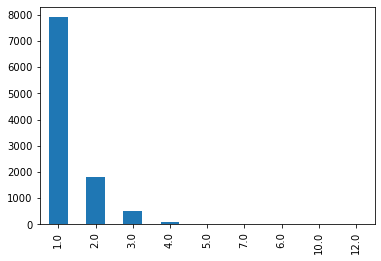

In [152]:
df.bedrooms.value_counts().plot.bar();

We are going to discretize for 1,2,3 and more than 3

In [153]:
conditions = [df.bedrooms == 1,
               df.bedrooms == 2,
               df.bedrooms == 3,
               df.bedrooms > 3]

results = ['01_One','02_Two','03_Three','04_four_or_more']

df['bedrooms_disc'] = np.select(conditions, results, default = -999)

/var/folders/0t/3w7994qx4434q0n0z7_314j80000gn/T/ipykernel_32896/1285604207.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bedrooms_disc'] = np.select(conditions, results, default = -999)


In [154]:
df.bedrooms_disc.value_counts()

01_One             7904
02_Two             1807
03_Three            504
04_four_or_more     162
Name: bedrooms_disc, dtype: int64

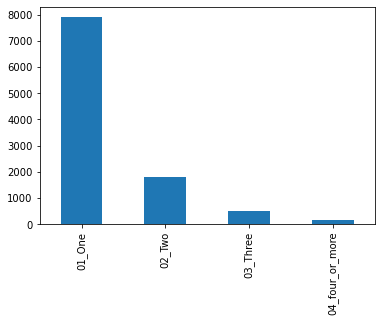

In [155]:
df.bedrooms_disc.value_counts().plot.bar();

**Discretize accommodates, beds and number_of_reviews**

/var/folders/0t/3w7994qx4434q0n0z7_314j80000gn/T/ipykernel_32896/118584126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['accommodates_disc'] = pd.qcut(df.accommodates,[0, 0.5, 0.8, 1],


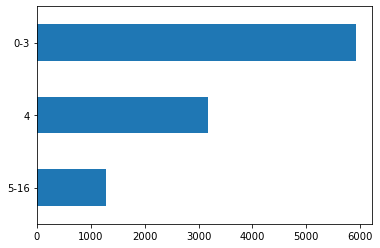

In [156]:
df['accommodates_disc'] = pd.qcut(df.accommodates,[0, 0.5, 0.8, 1],
                                 labels = ['0-3','4','5-16'])

df['accommodates_disc'].value_counts().sort_index(ascending = False).plot.barh();

/var/folders/0t/3w7994qx4434q0n0z7_314j80000gn/T/ipykernel_32896/974234075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_of_reviews_disc'] = pd.qcut(df.number_of_reviews,[0, 0.5, 0.8, 1],


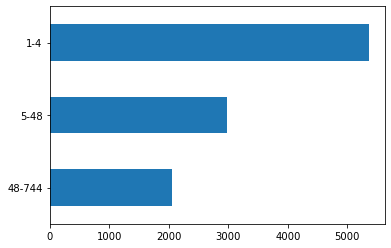

In [158]:
df['number_of_reviews_disc'] = pd.qcut(df.number_of_reviews,[0, 0.5, 0.8, 1],
                                      labels = ['1-4','5-48','48-744'])

df['number_of_reviews_disc'].value_counts().sort_index(ascending = False).plot.barh();

## Creating variables with external data

Estimation of the square meters of the property

Let's use the following algorithm:

* One room: m2 = 50
* two rooms: m2 = 70
* three rooms: m2 = 90
* four rooms: m2 = 120
* five or more rooms: m2 = 150

In [159]:
conditions = [df.bedrooms == 1,
               df.bedrooms == 2,
               df.bedrooms == 3,
               df.bedrooms == 4,
               df.bedrooms > 4]

results = [50,70,90,120,150]

df['m2'] = np.select(conditions, results, default = -999)

/var/folders/0t/3w7994qx4434q0n0z7_314j80000gn/T/ipykernel_32896/436102474.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['m2'] = np.select(conditions, results, default = -999)


In [160]:
df['m2'].value_counts()

50     7904
70     1807
90      504
120     110
150      52
Name: m2, dtype: int64

Now we can estimate the purchase price of the property.

As we have a team of professional negotiators, we can calculate a 15% discount on the total value

In [161]:
df['buying_price'] = df.m2 * df.price_m2 * 0.85

/var/folders/0t/3w7994qx4434q0n0z7_314j80000gn/T/ipykernel_32896/1280289815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['buying_price'] = df.m2 * df.price_m2 * 0.85


In [162]:
df[['bedrooms','m2','district','price_m2','buying_price']].head(20)

,bedrooms,m2,district,price_m2,buying_price
0,2.0,70,Tempelhof - Schöneberg,6500.0,386750.0
5,1.0,50,Pankow,6400.0,272000.0
6,7.0,150,Treptow - Köpenick,5000.0,637500.0
8,1.0,50,Pankow,6400.0,272000.0
9,3.0,90,Pankow,6400.0,489600.0
10,4.0,120,Pankow,6400.0,652800.0
11,1.0,50,Pankow,6400.0,272000.0
12,1.0,50,Charlottenburg-Wilm.,7800.0,331500.0
15,1.0,50,Pankow,6400.0,272000.0
16,2.0,70,Pankow,6400.0,380800.0


Now we are going to give an example of what other types of variables we can build.

In this case we could do a lot with the x,y coordinates.

Since in tourism the location is very important.

For example, we could calculate the distances to different points of interest such as monuments, entertainment venues, sports venues, etc.

Simply as an example we are going to calculate the distance from each property to brandenburger tor.

Latitud: 52.5166047 Longitud: 13.3809897

Given the curvature of the earth, the distance between two points based on their latitude and longitude is calculated using a formula called the Haversine distance.

In [163]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6372.8 #Km

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [165]:
lat1 = 52.5166047
lon1 = 13.3809897

df['brandenburger_tor'] = df.apply(lambda register: haversine(lat1,lon1,register.latitude,register.longitude),axis = 1)




/var/folders/0t/3w7994qx4434q0n0z7_314j80000gn/T/ipykernel_32896/3624594373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brandenburger_tor'] = df.apply(lambda register: haversine(lat1,lon1,register.latitude,register.longitude),axis = 1)


In [166]:
df.groupby('district').brandenburger_tor.mean().sort_values()

district
Mitte                      2.614220
Tempelhof - Schöneberg     4.664805
Pankow                     4.675842
Charlottenburg-Wilm.       5.512389
Neukölln                   5.862191
Lichtenberg                8.115276
Reinickendorf             10.242348
Spandau                   14.769041
Treptow - Köpenick        14.995443
Name: brandenburger_tor, dtype: float64

# Final analysis

## Price analysis

In [169]:
df.total_price.describe()

count    10377.000000
mean       116.982760
std        159.849659
min         31.000000
25%         51.000000
50%         79.000000
75%        126.000000
max       5880.000000
Name: total_price, dtype: float64

In [171]:
temp = df.groupby('district')[['total_price','buying_price']].median()
temp

,total_price,buying_price
district,,
Charlottenburg-Wilm.,83.0,331500.0
Lichtenberg,65.0,221000.0
Mitte,90.0,340000.0
Neukölln,65.0,246500.0
Pankow,80.0,272000.0
Reinickendorf,66.0,263500.0
Spandau,78.0,255000.0
Tempelhof - Schöneberg,71.0,276250.0
Treptow - Köpenick,75.0,212500.0


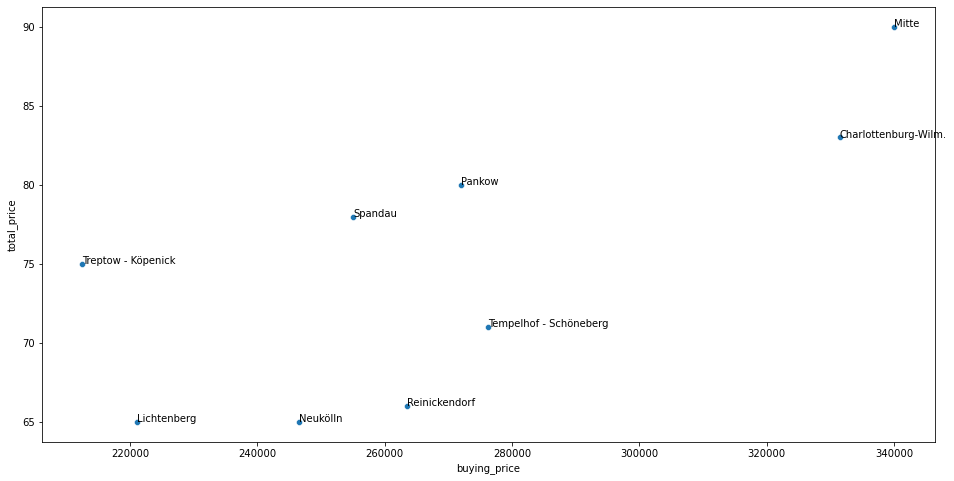

In [175]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'buying_price', y = 'total_price')
for cada in range(0,temp.shape[0]):  
    plt.text(temp.buying_price[cada], temp.total_price[cada], temp.index[cada])

There is a clear correlation between the purchase price in each district and the price we will be able to charge.

Three clusters of low-low, medium-medium and high-high are clearly perceived.

## Geographic analysis on a map

In [187]:
import folium
folium.Map(location=[52.5166047, 13.3809897],zoom_start=12)

**Let's analyze Spandau**

In [192]:
Spandau = df[df.district == 'Spandau'].copy()

In [193]:
berlin_map = folium.Map(location=[52.5166047, 13.3809897],zoom_start=12)

for x in range(0,len(Spandau)):
   folium.Marker(
      location = [Spandau.iloc[x]['latitude'], Spandau.iloc[x]['longitude']],
      popup = Spandau.iloc[x]['total_price'],
   ).add_to(berlin_map)

berlin_map

In [196]:
Spandau['total_price_disc'] = pd.qcut(Spandau['total_price'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

In [198]:
berlin_map = folium.Map(location=[52.5166047, 13.3809897],zoom_start=12)

for x in range(0,len(Spandau)):
   folium.CircleMarker(
      location = [Spandau.iloc[x]['latitude'], Spandau.iloc[x]['longitude']],
      popup = Spandau.iloc[x]['total_price'],
      fill=True,
      color = Spandau.iloc[x]['total_price_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(berlin_map)

berlin_map